In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Assuming you have a DataFrame data with columns 'Extracted_keyword' and 'field_of_study'
# Example: data = pd.read_csv('your_file.csv')
input_file = "data_chula.csv"  # Replace with your CSV file path
data = pd.read_csv(input_file)
# Prepare the TfidfVectorizer with ngram_range to capture bigrams or trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # (1, 2) captures unigrams and bigrams

# Apply KMeans clustering for each field of study
field_of_study_list = data["subjectArea"].unique()  # List of unique fields of study

# Create a dictionary to store the clustering results by field of study
field_clustering_results = {}

for field in field_of_study_list:
    # Filter the data for the current field of study
    field_data = data[data["subjectArea"] == field]
    
    # Prepare the text data for TF-IDF
    sentences = field_data["extracted_keywords"]
    
    # Compute the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(sentences)
    
    # Apply KMeans clustering (choose the number of clusters)
    num_clusters = 5  # You can modify this depending on your data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    
    # Add the cluster labels to the DataFrame for the current field of study
    field_data['cluster'] = kmeans.labels_
    
    # Identify the largest cluster by size
    largest_cluster = np.argmax(np.bincount(kmeans.labels_))
    
    # Get the indices of the largest cluster
    largest_cluster_indices = np.where(kmeans.labels_ == largest_cluster)[0]
    
    # Find the centroid of the largest cluster
    centroid = kmeans.cluster_centers_[largest_cluster]
    print(centroid)
    
    # Get the top keywords of the centroid (sorted by their importance)
    top_keywords_indices = centroid.argsort()[-10:][::-1]  # Top 10 keywords
    top_keywords = [vectorizer.get_feature_names_out()[i] for i in top_keywords_indices]
    
    # Store the results in the dictionary
    field_clustering_results[field] = {
        'top_keywords': top_keywords,
        'field_data': field_data,
        'largest_cluster': largest_cluster,
        'cluster_centroids': kmeans.cluster_centers_
    }

# Print the top keywords for each field of study
for field, results in field_clustering_results.items():
    print(f"Field of Study: {field}")
    print(f"Top Keywords: {results['top_keywords']}")
    print()

C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

[0.0007235  0.00073744 0.00073744 ... 0.00073744 0.00073744 0.00073744]
[0.00176021 0.00176021 0.0050142  0.0018996  0.00182593 0.00192322
 0.00176021 0.00176021 0.00179873 0.00179873 0.00176021 0.00176021
 0.00176021 0.00179873 0.00179873 0.00176021 0.00176021 0.00344776
 0.00179873 0.00189152 0.00502117 0.00357895 0.00182593 0.00176021
 0.00176021 0.00176021 0.00176021 0.00176021 0.00176021 0.00176021
 0.00176021 0.00176021 0.00176021 0.00179873 0.00176021 0.00176021
 0.00176021 0.00179873 0.00179873 0.00176021 0.00176021 0.00336107
 0.00179873 0.00187811 0.00187811 0.00179873 0.00182593 0.00176021
 0.00176021 0.00176021 0.00176021 0.00176021 0.00176021 0.00196658
 0.00196658 0.00176021 0.00176021 0.         0.         0.00176021
 0.00176021 0.01195566 0.00194986 0.00190107 0.00190107 0.00176021
 0.         0.00179873 0.00179873 0.00176021 0.00176021 0.0091091
 0.00187811 0.00195857 0.00187811 0.00179873 0.00176021 0.00176021
 0.00176021 0.00176021 0.00182593 0.00176021 0.00176021 0.

C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

[0.00131906 0.00069366 0.00069366 ... 0.00065983 0.00065983 0.00065983]
[0.00078873 0.00081503 0.00081503 ... 0.00078873 0.00081503 0.00081503]
[0.00179061 0.00176086 0.00167834 0.00167834 0.00179061 0.00167834
 0.00167834 0.00167834 0.00167834 0.00320496 0.00171502 0.00167834
 0.00167834 0.00167834 0.00167834 0.0032675  0.00178195 0.00171502
 0.00167834 0.00167834 0.00167834 0.00174091 0.00171502 0.00167834
 0.00167834 0.00171502 0.00167834 0.00167834 0.00338836 0.00171502
 0.00191131 0.00167834 0.00167834 0.00167834 0.00174091 0.00174091
 0.00171502 0.00171502 0.00171502 0.00171502 0.         0.
 0.00167834 0.00167834 0.00167834 0.00177704 0.00167834 0.00167834
 0.00496008 0.00171502 0.00167834 0.00167834 0.00167834 0.00167834
 0.00179061 0.00167834 0.00167834 0.00167834 0.0032675  0.00320496
 0.00171502 0.00171502 0.00501349 0.00195302 0.00174091 0.00183702
 0.00186093 0.00186093 0.00167834 0.00167834 0.00167834 0.00167834
 0.00167834 0.00167834 0.00167834 0.00167834 0.00167834 0.00

C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\Wachirawit Chumwong\AppData\Local\Temp\ipykernel_9320\2932789908.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = [
    'donation , organ',
]
X = vectorizer.fit_transform(corpus)
for i in X:
  print(i)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 2)>
  Coords	Values
  (0, 0)	0.7071067811865475
  (0, 1)	0.7071067811865475


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_file = "data_chula.csv"  # Replace with your CSV file path
data = pd.read_csv(input_file)

field_data = data[data["subjectArea"] == 'MEDI']
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    
# Prepare the text data for TF-IDF
sentences = field_data["extracted_keywords"]

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(sentences)

# Apply KMeans clustering (choose the number of clusters)
num_clusters = 5  # You can modify this depending on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

y = kmeans.cluster_centers_
y




array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00017219, 0.00017219, 0.00017219, ..., 0.00018066, 0.00018066,
        0.00017219],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

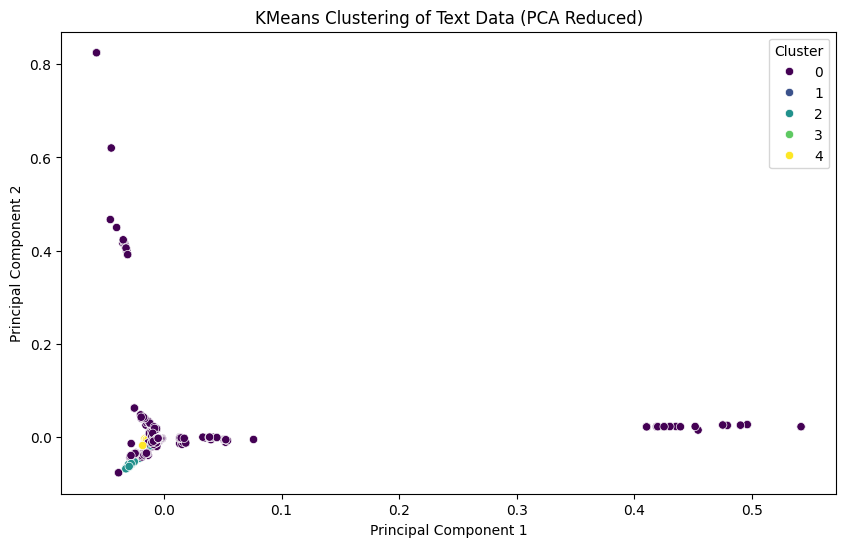

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
input_file = "data_chula.csv"  # Replace with your CSV file path
data = pd.read_csv(input_file)

# Filter data for the specific field
field_data = data[data["subjectArea"] == 'MEDI']

# Prepare the text data for TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
sentences = field_data["extracted_keywords"]

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(sentences)

# Apply KMeans clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce the dimensionality for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Get cluster assignments
cluster_labels = kmeans.labels_

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "x": reduced_data[:, 0],
    "y": reduced_data[:, 1],
    "cluster": cluster_labels
})

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="x", y="y", hue="cluster", palette="viridis", data=plot_data, legend="full"
)
plt.title("KMeans Clustering of Text Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
data.loc[data['subjectArea'] == 'MEDI']

,Unnamed: 0,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,extracted_keywords
4,5,The influence of neighbor effect and urbanizat...,Progress in Transplantation,natco rights reserved introduction population ...,Choice Consumer wellness Decision-making Neigh...,MEDI,01/03/2018,The influence of neighbor effect and urbanizat...,"donation , organ"
6,8,Lowered quality of life in mood disorders is a...,Journal of Evaluation in Clinical Practice,john wiley sons ltd. rationale aims major af...,bipolar disorder child abuse depressive disord...,MEDI,01/08/2018,Lowered quality of life in mood disorders is a...,"hrqol , tsh"
8,10,Current practice of diagnosis and management o...,Journal of Critical Care,elsevier inc. purpose resource limited setti...,Acute kidney injury ICU Practice Resource limi...,MEDI,01/08/2018,Current practice of diagnosis and management o...,"aki , settings"
11,15,Falls among physically active elderly in senio...,Clinical Interventions in Aging,maneeprom et al purpose mixed method study a...,Elderly Fall Fall prevention Perception Senior...,MEDI,01/01/2018,Falls among physically active elderly in senio...,"fall , falls"
12,16,Clif-sofa and urine neutrophil gelatinase-asso...,Journal of the Medical Association of Thailand,medical association thailand rights reserved o...,Acute-on-chronic liver failure Cirrhosis Morta...,MEDI,01/11/2018,Clif-sofa and urine neutrophil gelatinase-asso...,"clif , aclf"
...,...,...,...,...,...,...,...,...,...
16289,20185,Comparison of full-endoscopic and tubular-base...,European Spine Journal,author(s exclusive licence springer verlag gmb...,Decompression Full-endoscopic spine surgery Lu...,MEDI,01/08/2023,Comparison of full-endoscopic and tubular-base...,"decompression , surgery"
16291,20187,Effect of Smilax spp. and Phellinus linteus co...,BMC Complementary Medicine and Therapies,author(s).background prevalence breast cancer ...,Adjuvant drug Breast cancer Herbal medicine Ph...,MEDI,01/12/2023,Effect of Smilax spp. and Phellinus linteus co...,"pss , pl"
16299,20195,Clinical outcomes of low-dose pharmacokinetic-...,Haemophilia,john wiley sons ltd. introduction despite re...,coagulation factor VIII haemophilia A pharmaco...,MEDI,01/01/2023,Clinical outcomes of low-dose pharmacokinetic-...,"fviii , ehl"
16310,20206,Inhibition of histone deacetylase 6 destabiliz...,Journal of Biomedical Science,author(s).background leading cause cancer rela...,Extracellular signal-regulated kinase (ERK) Gl...,MEDI,01/12/2023,Inhibition of histone deacetylase 6 destabiliz...,"hdac6 , erk"


In [25]:
from gensim.models import Word2Vec
df = pd.read_csv('data_chula2.csv')
df.loc[df['subjectArea'] == 'MEDI']
sample = df.loc[df['subjectArea'] == 'MEDI'][:10]
sample

w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=100, window=5, min_count=1, workers=4)

ModuleNotFoundError: No module named 'gensim'